In [1]:
import os
import sys
import argparse
sys.path.append("../..")
sys.path.append("../../..")
from lib.logging import print_msg
from lib.read_data import data_read

def load_data(path):
    print(path)
    data = {}
    for pkl_name in sorted(os.listdir(path)):
        if ".pkl" in pkl_name:
            print(pkl_name)
            data[int(pkl_name.split(".pkl")[0])] = data_read(path, pkl_name)
    return data

result_path = "../../workload_manage/five_workloads/result"

data = {}

for workload_name in sorted(os.listdir(result_path)):
    print(workload_name)
    if workload_name.startswith("workload"):
        data[workload_name] = {}


        for run_name in ["bf", "gd"]:
            if run_name == "gd":
                result_search_path_temp = os.path.join(result_path, workload_name, run_name)
                for timeout_name in sorted(os.listdir(result_search_path_temp)):
                    if "_" in timeout_name:
                        result_search_path = os.path.join(result_search_path_temp, timeout_name)
                        data[workload_name][f"gd_{timeout_name}"] = load_data(result_search_path)
            else:
                result_search_path = os.path.join(result_path, workload_name, run_name)
                data[workload_name][run_name] = load_data(result_search_path)

workload_1
../../workload_manage/five_workloads/result/workload_1/bf
10.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 10.pkl
[success]
12.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 12.pkl
[success]
14.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 14.pkl
[success]
2.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 2.pkl
[success]
22.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 22.pkl
[success]
24.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 24.pkl
[success]
28.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 28.pkl
[success]
4.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 4.pkl
[success]
6.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 6.pkl
[success]
8.pkl
[load output] ../../workload_manage/five_workloads/result/workload_

gd_5_5


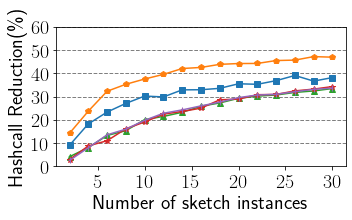

gd_5_5


<Figure size 432x288 with 0 Axes>

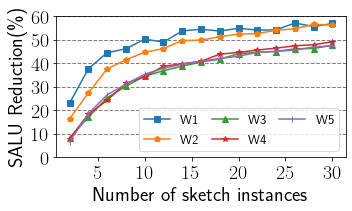

gd_5_5


<Figure size 432x288 with 0 Axes>

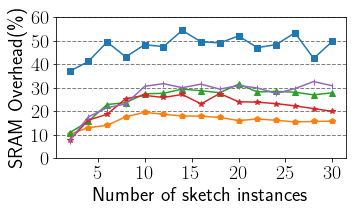

<Figure size 432x288 with 0 Axes>

In [64]:
def get_reduction_rate(baseline, opt):
    return (baseline - opt)/(baseline+0.000001) * 100

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'


for resource in ["hashcall", "salu", "sram"]:
    fig, ax = plt.subplots(figsize=(5, 3))
    for run_name in ["gd_5_5"]:
        print(run_name)
        for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
            # print(workload)
            key_list = sorted(data[workload][run_name].keys())
            # print(key_list)
            plot_data = []
            actual_key_list = []
            min_list = []
            max_list = []

#             before_list = {}
#             after_list = {}
#             ratio_list = {}
#             before_list[resource] = []
#             after_list[resource] = []
#             ratio_list[resource] = []

            for key in key_list:
                df = data[workload][run_name][key]["avg_resource"]
                ratio = get_reduction_rate(df["before"], df["after"])
#                 before_list[resource].append(df["before"][resource])
#                 after_list[resource].append(df["after"][resource])
                if resource == "sram":
                    plot_data.append(-ratio[resource])
                else:
                    plot_data.append(ratio[resource])

                actual_key_list.append(key)
#                 plot_data.append(median(list_data))
#                 max_list.append(max(list_data) - median(list_data))
#                 min_list.append(median(list_data) - min(list_data))
#                 print(key, len(list_data), min(list_data), median(list_data), max(list_data))
            marker = "o"
            if workload == "workload_1":
                workload_name = "W1"
                color="C0"
                marker = markerst1
            if workload == "workload_2":
                workload_name = "W2"
                color="C1"
                marker = markerst2
            if workload == "workload_3":
                workload_name = "W3"
                color="C2"
                marker = markerst3
            if workload == "workload_4":
                workload_name = "W4"
                color="C3"
                marker = markerst4
            if workload == "workload_5":
                workload_name = "W5"
                color="C4"
                marker = markerst5

            label = workload_name
            ax.plot(actual_key_list, plot_data, label=label, color=color, marker=marker)
            # ax.errorbar(actual_key_list, plot_data, label=label, color=color, marker=marker, yerr=[min_list, max_list])
            # ax.errorbar(actual_key_list, max_list, label=label, color=color)
            # print("avg", plot_data)
            # print("max", max_list)
            # break
        # break

    key_list = [i*2 for i in range(1, 16)]

    ax.tick_params(axis='y', labelsize=20)
#     ax.set_xticks(key_list)
#     ax.set_xticklabels([10, 20, 30], fontsize=20)
#     ax.set_xticklabels(fontsize=20)
#     ax.xaxis.label.set_size(20)
#     plt.xlabel('xlabel', fontsize=18)
    ax.set_xlabel('Number of sketch instances', fontsize=20)
    plt.xticks(fontsize=20)
    if resource == "hashcall":
        ax.set_ylim([0, 60])
        ax.set_ylabel(f"Hashcall Reduction(\\%)", fontsize=20)
        filename = "hashcall_reduction.pdf"
#         plt.legend(loc="lower right", fontsize=13, ncol=3, columnspacing=1)
    
    if resource == "salu":
        ax.set_ylim([0, 60])
        ax.set_ylabel(f"SALU Reduction(\\%)", fontsize=20)
        filename = "salu_reduction.pdf"
        plt.legend(loc="lower right", fontsize=13, ncol=3, columnspacing=1)

    if resource == "sram":
        ax.set_ylim([0, 60])
        ax.set_ylabel(f"SRAM Overhead(\\%)", fontsize=20)
        filename = "sram_overhead.pdf"
#         plt.legend(loc="upper right", fontsize=13, ncol=3, columnspacing=1)

    from matplotlib.ticker import MultipleLocator
    ax.yaxis.set_major_locator(MultipleLocator(10))

    plt.grid(color='gray', linestyle='--', linewidth=1, axis='y')
    fig.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.clf()

